In [47]:
import os
import pandas as pd
import seaborn as sns

%matplotlib inline

In [63]:
folder_path = 'D:\\CloudSim2\\MultiLogsRL_Logs\\QlearningSoftmax\\Qlearning_softmax_0.8_0.6\log'
file_list = os.listdir(folder_path)

In [64]:

def last_few_lines(file_name,n_lines):
    file_handle = open(file_name)
    file_size = file_handle.tell()
    file_handle.seek(max(file_size - 2*1024, 0))
    return file_handle.read().splitlines()[-n_lines:]

In [65]:

required_indices = [0,4,5,6]
all_run_summary =[]
for file in file_list:
    file_name = os.path.join(folder_path,file)
    run_summary   = last_few_lines(file_name,25)
    run_summary_required = [run_summary[index] for index in required_indices]
    run_data =[]
    for line in run_summary_required:
        idx = line.find(':')
        summary = line[idx+1:].strip()
        run_data.append(summary)
    all_run_summary.append(run_data)

In [66]:
all_run_summary

[['20110303_lr_RL_1.2', '142.26 kWh', '17756', '0.00724%'],
 ['20110306_lr_RL_1.2', '107.01 kWh', '13160', '0.00667%'],
 ['20110309_lr_RL_1.2', '120.46 kWh', '15429', '0.00816%'],
 ['20110322_lr_RL_1.2', '150.50 kWh', '22709', '0.00788%'],
 ['20110325_lr_RL_1.2', '128.59 kWh', '17391', '0.00760%'],
 ['20110403_lr_RL_1.2', '195.70 kWh', '26847', '0.00756%'],
 ['20110409_lr_RL_1.2', '155.34 kWh', '22038', '0.00760%'],
 ['20110411_lr_RL_1.2', '151.78 kWh', '21504', '0.00796%'],
 ['20110412_lr_RL_1.2', '131.28 kWh', '17939', '0.00768%']]

In [67]:
df = pd.DataFrame(data = all_run_summary,columns=['ExperimentName','Energy(KWh)_str','Migrations_str','SLA(%)_str'])

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ExperimentName   9 non-null      object
 1   Energy(KWh)_str  9 non-null      object
 2   Migrations_str   9 non-null      object
 3   SLA(%)_str       9 non-null      object
dtypes: object(4)
memory usage: 416.0+ bytes


In [69]:
df['Energy(KWh)'] = df['Energy(KWh)_str'].apply(lambda x: x[:-3].strip()).astype(float)
df['Migrations'] = df['Migrations_str'].astype(int)
df['SLA(%)'] = df['SLA(%)_str'].apply(lambda x: x[:-1].strip()).astype(float)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ExperimentName   9 non-null      object 
 1   Energy(KWh)_str  9 non-null      object 
 2   Migrations_str   9 non-null      object 
 3   SLA(%)_str       9 non-null      object 
 4   Energy(KWh)      9 non-null      float64
 5   Migrations       9 non-null      int32  
 6   SLA(%)           9 non-null      float64
dtypes: float64(2), int32(1), object(4)
memory usage: 596.0+ bytes


In [71]:
df.head()

,ExperimentName,Energy(KWh)_str,Migrations_str,SLA(%)_str,Energy(KWh),Migrations,SLA(%)
0,20110303_lr_RL_1.2,142.26 kWh,17756,0.00724%,142.26,17756,0.00724
1,20110306_lr_RL_1.2,107.01 kWh,13160,0.00667%,107.01,13160,0.00667
2,20110309_lr_RL_1.2,120.46 kWh,15429,0.00816%,120.46,15429,0.00816
3,20110322_lr_RL_1.2,150.50 kWh,22709,0.00788%,150.50,22709,0.00788
4,20110325_lr_RL_1.2,128.59 kWh,17391,0.00760%,128.59,17391,0.00760


In [72]:
df['Days']=  [x+1 for x in range(9)]

In [73]:
df.head()

,ExperimentName,Energy(KWh)_str,Migrations_str,SLA(%)_str,Energy(KWh),Migrations,SLA(%),Days
0,20110303_lr_RL_1.2,142.26 kWh,17756,0.00724%,142.26,17756,0.00724,1
1,20110306_lr_RL_1.2,107.01 kWh,13160,0.00667%,107.01,13160,0.00667,2
2,20110309_lr_RL_1.2,120.46 kWh,15429,0.00816%,120.46,15429,0.00816,3
3,20110322_lr_RL_1.2,150.50 kWh,22709,0.00788%,150.50,22709,0.00788,4
4,20110325_lr_RL_1.2,128.59 kWh,17391,0.00760%,128.59,17391,0.00760,5


[Text(0.5, 1.0, 'Energy Consumption for 30 day workload (Lr-Mmt)')]

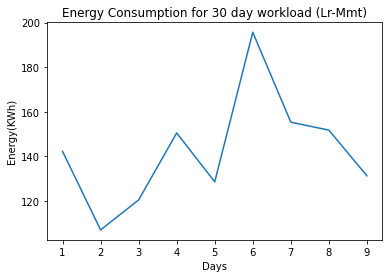

In [74]:
sns.lineplot(data = df,x = 'Days',y='Energy(KWh)',markers=True).set(title='Energy Consumption for 30 day workload (Lr-Mmt)')

[Text(0.5, 1.0, 'No of VM Migrations for 30 day workload (Lr-Mmt)')]

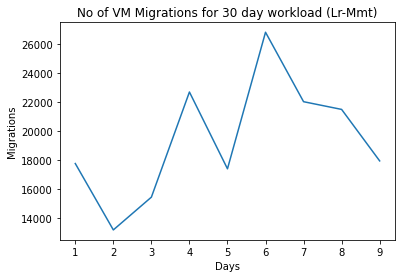

In [75]:
sns.lineplot(data = df,x = 'Days',y='Migrations',markers=True).set(title='No of VM Migrations for 30 day workload (Lr-Mmt)')

[Text(0.5, 1.0, 'SLA violation for 30 day workload (Lr-Mmt)')]

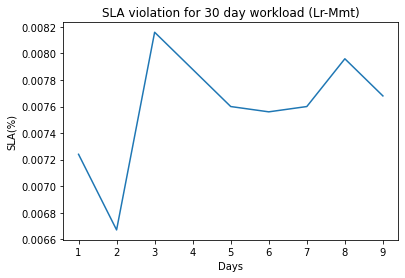

In [76]:
sns.lineplot(data = df,x = 'Days',y='SLA(%)',markers=True).set(title='SLA violation for 30 day workload (Lr-Mmt)')

In [77]:
df.to_csv('D:\CloudSim2\MultiLogsRL_New\Lr-RL_30_day_logs.csv',index=False)